# **US DEBT TO GDP**
---
- Tracking Total Debt of Economy as a Percentage of the Total Income of the Economy (GDP)
- Tracking Total Amount of Debt Service Payments Relative to GDP
- Over 12yr Period


### Import Libraries 

In [1]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

### Import US GDP and Debt from [Federal Reserve Economic Data Repository (FRED)](https://fred.stlouisfed.org/)

In [2]:
files = os.listdir('data/FRED')
measurements = {}
for file in files: 
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        measurements[name] = pd.read_csv('data/FRED/'+file, index_col='DATE')
        measurements[name].index = pd.to_datetime(measurements[name].index)
print('List of Measurements: ', end=' ')
for i in measurements.keys(): 
    print(i.upper(), end=' ')
print('\n')
print(pd.read_csv('data/references/FREDdata_refs.csv'))

List of Measurements:  ASTLL ASTDSL ASCMA ASFMA NCBDBIQ027S GFDEBTN MTSO133FMS NCBLL REVOLSL ASMRMA SLGSDODNS ASHMA MVLOAS SLOAS NNBLL GDP TOTALSL FBDSILQ027S 

    Unnamed: 0    Series_ID                                            URLS
0            0        ASCMA        https://fred.stlouisfed.org/series/ASCMA
1            1        ASFMA        https://fred.stlouisfed.org/series/ASFMA
2            2        ASHMA        https://fred.stlouisfed.org/series/ASHMA
3            3       ASMRMA       https://fred.stlouisfed.org/series/ASMRMA
4            4       ASTDSL       https://fred.stlouisfed.org/series/ASTDSL
5            5        ASTLL        https://fred.stlouisfed.org/series/ASTLL
6            6  FBDSILQ027S  https://fred.stlouisfed.org/series/FBDSILQ027S
7            7          GDP          https://fred.stlouisfed.org/series/GDP
8            8      GFDEBTN      https://fred.stlouisfed.org/series/GFDEBTN
9            9       MVLOAS       https://fred.stlouisfed.org/series/MVLOAS
10 

In [3]:
def _1960_Present(file_addy): 
    new_df = file_addy['1960-01-01':'2021-10-01']
    new_df = new_df.astype(float, errors='raise')
    #new_df.info()
    return new_df

### Find Total Debt 

In [4]:
# All Sectors; Total Loans; Liability, Level 
ASTLL = _1960_Present(measurements['ASTLL'])
# All Sectors; Total Debt Securities; Liability, Level
ASTDSL = _1960_Present(measurements['ASTDSL'])
# Gross Domestic Product 
GDP = _1960_Present(measurements['GDP'])

In [5]:
total_debt = pd.concat([ASTLL,ASTDSL,GDP], axis=1, join='outer')
total_debt.info()
total_debt.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 1960-01-01 to 2021-10-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ASTLL   248 non-null    float64
 1   ASTDSL  248 non-null    float64
 2   GDP     248 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


ASTLL     0
ASTDSL    0
GDP       0
dtype: int64

In [7]:
# GDP measured in BILLIONS 
# ASTLL + ASTDSL measured in MILLIONS
total_debt['GDP'] = total_debt['GDP'] * 1000

In [8]:
total_debt['Total_Debt'] = total_debt['ASTLL'] + total_debt['ASTDSL']
total_debt['Total_Debt_%GDP'] = total_debt['Total_Debt']/total_debt['GDP']

total_debt.tail()

,ASTLL,ASTDSL,GDP,Total_Debt,Total_Debt_%GDP
DATE,,,,,
2020-10-01,29921572.0,53108991.0,21477597.0,83030563.0,3.865915
2021-01-01,30317768.0,53804076.0,22038226.0,84121844.0,3.817088
2021-04-01,30756356.0,54574168.0,22740959.0,85330524.0,3.752283
2021-07-01,31414420.0,54912165.0,23202344.0,86326585.0,3.720598
2021-10-01,32120663.0,56187773.0,24002815.0,88308436.0,3.679087


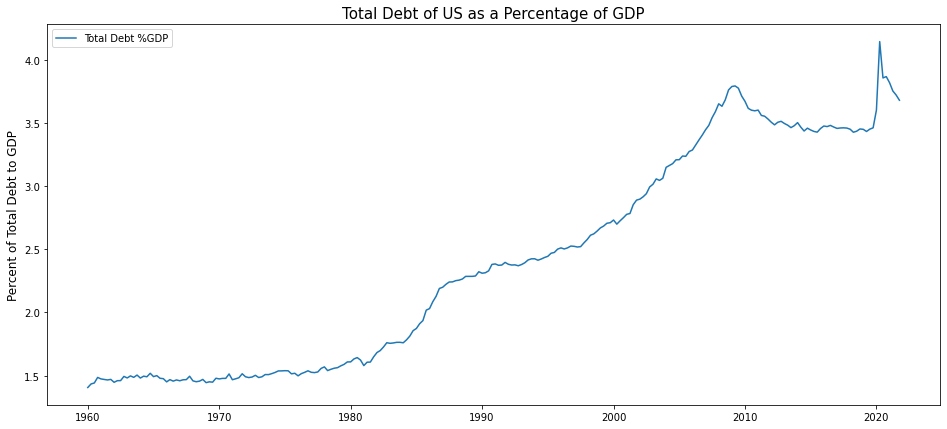

In [9]:
plt.figure(figsize=(16,7))

plt.plot(total_debt['Total_Debt_%GDP'], label='Total Debt %GDP')

plt.title('Total Debt of US as a Percentage of GDP', fontsize=15)
plt.ylabel('Percent of Total Debt to GDP', fontsize=12)
plt.legend(loc=2)
plt.show()